In [1]:
import import_ipynb
from base.datasets import load_real_path, obtain_bird_data
from base.models import StatEcoNet_H1, StatEcoNet_H1_Combined, \
                        StatEcoNet_H3_Combined
from base.AAAI21_plots import main_fig4, main_fig5, main_fig6

importing Jupyter notebook from /scratch/Eugene/codes/grt_hist/StatEcoNet/StatEcoNet/base/datasets.ipynb
importing Jupyter notebook from /scratch/Eugene/codes/grt_hist/StatEcoNet/StatEcoNet/base/models.ipynb
importing Jupyter notebook from /scratch/Eugene/codes/grt_hist/StatEcoNet/StatEcoNet/base/AAAI21_plots.ipynb


In [2]:
import torch
import numpy as np
import pandas as pd

# Figure 4. Selected synthetic features by StachEcoNet 

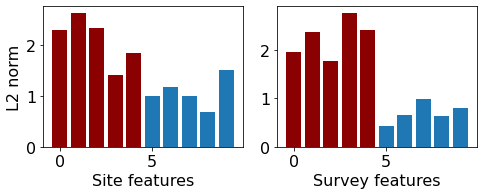

In [3]:
def get_fig4(nSites, nVisits, rho):
    data_size = str(nSites) + "x" + str(nVisits)
    x_dim = 10
    w_dim = 10
    dir_path = "AAAI21/main/fig4/"

    # StatEcoNet
    model_id = 2
    mixed = 0.001
    nN2 = 16
    final2_model = StatEcoNet_H1(x_dim, w_dim, nN2)
    trial=1
    full_path = dir_path + data_size + '_rho' + str(rho) + \
                "_m" + str(model_id) + "_r" + str(mixed) + "_t" + str(trial)
    final2_model.load_state_dict(torch.load(full_path + "_final_model.pt"))

    main_fig4(final2_model, x_dim, w_dim)

get_fig4(nSites=3000, nVisits=10, rho=1)

# Bird dataset for Figure 5 & 6

In [4]:
species_name = "Pacific Wren"

# The optimal l2/l1 mixed norm weights for each fold
f1_mix = 0.01
f2_mix = 0
f3_mix = 0.001

# Figure 5. Histograms for Pacific Wren 

data path: ../data/OR2020/Pacific Wren/
data path: ../data/OR2020/Pacific Wren/
data path: ../data/OR2020/Pacific Wren/


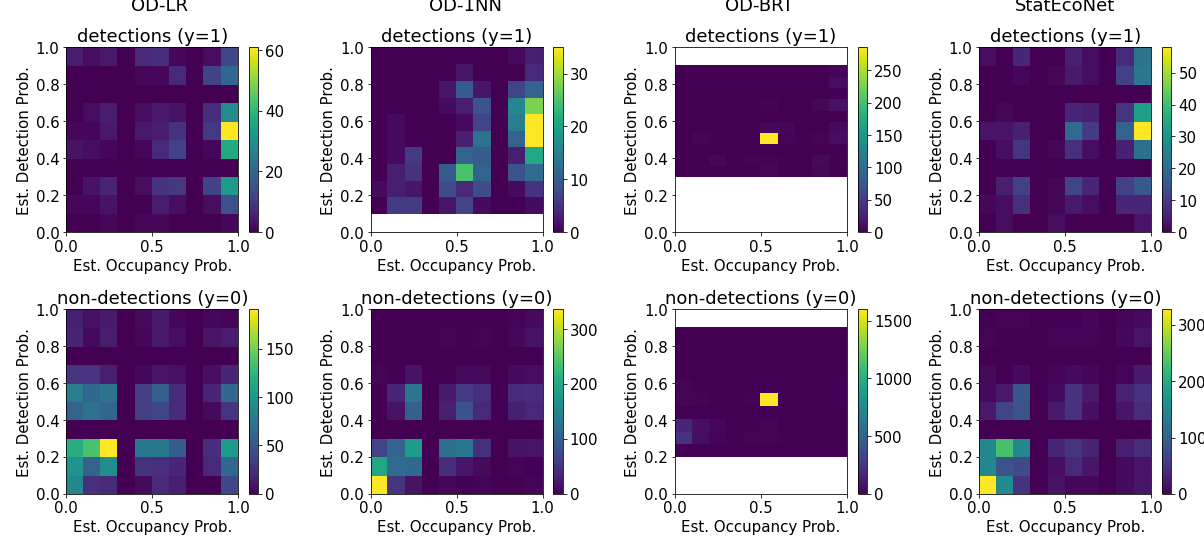

In [5]:
def show_density(species_name, fold, model3_reg):
    dir_path = "AAAI21/main/fig5/"
    nn_result = pd.read_csv("AAAI21/NN_test_"+species_name+".csv")
    brt_result = pd.read_csv("AAAI21/BRT_test_"+species_name+".csv")

    # Load true test Y
    data_path = load_real_path(species_name)
    x_dim, w_dim, k, x_train, w_train, y_train, \
    x_valid, w_valid, y_valid, \
    x_test, w_test, y_test = obtain_bird_data(data_path, fold)

    # OD-LR
    model_id = 0
    tmp = nn_result[(nn_result["model.id"] == 0) & \
                    (nn_result["fold"] == fold)]
    assert len(tmp) == 10
    trial = np.argmax(tmp['test.auprc']) + 1
    full_path = dir_path + species_name + "_f" + str(fold) + \
                "_m" + str(model_id) + "_w" + str(0) + "_t" + str(trial)
    psi1 = pd.read_csv(full_path + "_psi_hat.csv", header=None)
    p1 = pd.read_csv(full_path + "_p_hat.csv", header=None)

    # OD-1NN
    model_id = 1
    tmp = nn_result[(nn_result["model.id"] == 1) & \
                    (nn_result["fold"] == fold)]
    assert len(tmp) == 10
    trial = np.argmax(tmp['test.auprc']) + 1
    full_path = dir_path + species_name + "_f" + str(fold) + \
                "_m" + str(model_id) + "_w" + str(0) + "_t" + str(trial)
    psi2 = pd.read_csv(full_path + "_psi_hat.csv", header=None)
    p2 = pd.read_csv(full_path + "_p_hat.csv", header=None)

    # StatEcoNet
    model_id = 3
    tmp = nn_result[(nn_result["model.id"] == 3) & \
                    (nn_result["fold"] == fold) & \
                    (nn_result["mixed.weight"] == model3_reg)]
    assert len(tmp) == 10
    trial =  np.argmax(tmp['test.auprc']) + 1
    full_path = dir_path +species_name + "_f" + str(fold) + \
                "_m" + str(model_id) + "_w" + str(model3_reg) + \
                "_t" + str(trial)
    psi4 = pd.read_csv(full_path + "_psi_hat.csv", header=None)
    p4 = pd.read_csv(full_path + "_p_hat.csv", header=None)

    # OD-BRT
    dir_path = "AAAI21/main/fig5/BRT/"
    tmp = brt_result[brt_result.fold == fold]
    trial = np.argmax(tmp['test.auprc']) + 1
    brt_path = dir_path + species_name + "/fold" + str(fold) + \
               "/trial" + str(trial) + "/"
    psi3 = pd.read_csv(brt_path + "Pred_occProbs.csv", header=None)
    p3 = pd.read_csv(brt_path + "Pred_detProbs.csv", header=None)

    return(psi1, p1, psi2, p2, psi3, p3, psi4, p4, y_test)

def get_fig5(species_name, f1_mix, f2_mix, f3_mix):
    psi11, p11, psi12, p12, psi13, p13, psi14, p14, y1_test = \
    show_density(species_name, 1, f1_mix)
    psi21, p21, psi22, p22, psi23, p23, psi24, p24, y2_test = \
    show_density(species_name, 2, f2_mix)
    psi31, p31, psi32, p32, psi33, p33, psi34, p34, y3_test = \
    show_density(species_name, 3, f3_mix)

    psi1 = psi11.append(psi21).append(psi31)
    p1 = p11.append(p21).append(p31)
    psi2 = psi12.append(psi22).append(psi32)
    p2 = p12.append(p22).append(p32)
    psi3 = psi13.append(psi23).append(psi33)
    p3 = p13.append(p23).append(p33)
    psi4 = psi14.append(psi24).append(psi34)
    p4 = p14.append(p24).append(p34)
    y_test = torch.cat((y1_test, y2_test, y3_test),0)

    main_fig5(y_test, psi1, p1, psi2, p2, psi3, p3, psi4, p4, species_name)

get_fig5(species_name, f1_mix, f2_mix, f3_mix)

# Figure 6. Selected site/survey features by OD-BRT and StatEcoNet

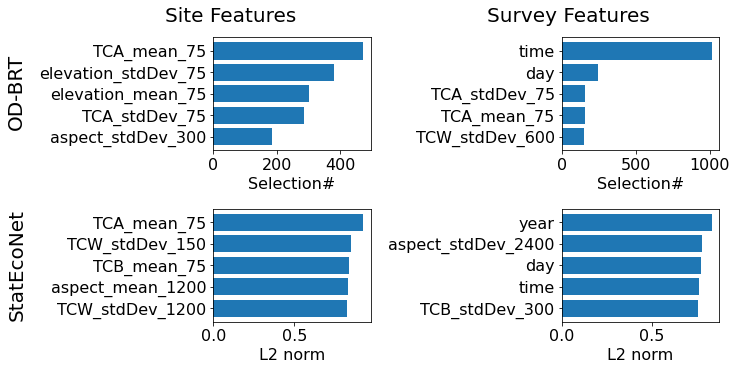

In [6]:
x_dim = 28
w_dim = 3
def show_feature_selection(species_name, fold, mixed):
    opts = pd.read_csv("opt/opt_bird_NN.csv")
    dir_path = "AAAI21/main/fig6/"
    nn_result = pd.read_csv("AAAI21/NN_test_"+species_name+".csv")
    k = 3

    # 3. BRT
    brt_features = pd.read_csv("AAAI21/brt_bird_features.csv")
    tmp = brt_features[(brt_features["species_name"] == species_name) & \
                       (brt_features["fold"] == fold)]
    brt_site = tmp.iloc[0,2:30].tolist()
    brt_survey = tmp.iloc[0,31:62].tolist()
    occ3_data = brt_site
    det3_data = brt_survey
    assert len(occ3_data) == x_dim
    assert len(det3_data) == x_dim + w_dim

    # 4. StatEcoNet
    model_id = 3 
    tmp = nn_result[(nn_result["fold"] == fold) & \
                    (nn_result["model.id"] == 3) & \
                    (nn_result["mixed.weight"] == mixed)]
    assert len(tmp) == 10
    trial = np.argmax(tmp['test.auprc']) + 1         
    full_path = dir_path + species_name + "_f" + str(fold) + \
                "_m" + str(model_id) + "_w" + str(mixed)  + "_t" + str(trial)
    # NOTE: changed model_id for StatEcoNet from 3 to 2 for offical use
    opt = opts[(opts.speices==species_name) & (opts.fold==fold) & \
               (opts.model_id==2)]
    nN= int(opt['nNeurons'].item())
    nL= int(opt['nLayers'].item())
    if nL == 1:
        final4_model = StatEcoNet_H1_Combined(x_dim, w_dim, nN, k)
    else:
        final4_model = StatEcoNet_H3_Combined(x_dim, w_dim, nN, k)

    final4_model.load_state_dict(torch.load(full_path + "_final_model.pt"))
    occ4_data = torch.norm(\
                list(final4_model.parameters())[0], dim=0).detach().numpy()
    det4_data = torch.norm(\
                list(final4_model.parameters())[2], dim=0).detach().numpy()

    return(np.array(occ3_data), np.array(det3_data), occ4_data, det4_data)

def get_fig6(species_name, f1_mix, f2_mix, f3_mix):
    fea_idx = pd.read_csv("AAAI21/feature_idx.csv", header=None)

    f1_occ3, f1_det3, f1_occ4, f1_det4 = \
    show_feature_selection(species_name, 1, f1_mix)
    f2_occ3, f2_det3, f2_occ4, f2_det4 = \
    show_feature_selection(species_name, 2, f2_mix)
    f3_occ3, f3_det3, f3_occ4, f3_det4 = \
    show_feature_selection(species_name, 3, f3_mix)

    main_fig6(f1_occ3, f1_occ4, f1_det3, f1_det4, x_dim, w_dim, fea_idx)

get_fig6(species_name, f1_mix, f2_mix, f3_mix)